In [7]:
import torch as th
import pickle
import os
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as pkl
import pandas as pd

In [29]:
subject_id = "red_20241212-20241220"
saveroot = f"/n/holylabs/LABS/alvarez_lab/Lab/VVS_Accentuation/Encoding_model_outputs/{subject_id}"
!ls {saveroot}

population_resp_pred_red_20241212-20241220_RN50_RN50rbst_L4B1_Lasso_Ridge.nc
population_resp_pred_red_20241212-20241220_RN50_RN50rbst_L4B1_Lasso_Ridge.pkl
population_resp_pred_red_20250123-20250126_RN50_RN50rbst_L4B1_Lasso_Ridge.nc
population_resp_pred_red_20250123-20250126_RN50_RN50rbst_L4B1_Lasso_Ridge.pkl
red_20241212-20241220_clipag_vitb32_meta_.transformer.resblocks.ResidualAttentionBlock9_clstoken_RidgeCV.pkl
red_20241212-20241220_clipag_vitb32_readout_.transformer.resblocks.ResidualAttentionBlock9_clstoken_RidgeCV.pth
red_20241212-20241220_clipag_vitb32_Xtfmer_.transformer.resblocks.ResidualAttentionBlock9_clstoken_RidgeCV.pkl
red_20241212-20241220_dinov2_vitb14_reg_meta_.blocks.NestedTensorBlock8_cls_token_RidgeCV.pkl
red_20241212-20241220_dinov2_vitb14_reg_readout_.blocks.NestedTensorBlock8_cls_token_RidgeCV.pth
red_20241212-20241220_dinov2_vitb14_reg_Xtfmer_.blocks.NestedTensorBlock8_cls_token_RidgeCV.pkl
red_20241212-20241220_radio_v2.5-b_meta_.model.blocks.Block9_summary_to

In [42]:
subject_id = "red_20241212-20241220"
modelname = "resnet50_robust"
layer_name = ".layer4.Bottleneck1"
dim_red = "pca1000"
regressor_name = "MultiTaskLassoCV" #"RidgeCV"
subject_id = "red_20241212-20241220"
saveroot = f"/n/holylabs/LABS/alvarez_lab/Lab/VVS_Accentuation/Encoding_model_outputs/{subject_id}"
readout_path = join(saveroot, f"{subject_id}_{modelname}_readout_{layer_name}_{dim_red}_{regressor_name}.pth")
transformer_path = join(saveroot, f"{subject_id}_{modelname}_Xtfmer_{layer_name}_{dim_red}_{regressor_name}.pkl")
meta_path = join(saveroot, f"{subject_id}_{modelname}_meta_{layer_name}_{dim_red}_{regressor_name}.pkl")

readout_weights = th.load(readout_path)
transformer_weights = pkl.load(open(transformer_path, "rb"))
meta_info = th.load(meta_path)
# red_20241212-20241220_resnet50_robust_readout_.layer4.Bottleneck1_pca1000_RidgeCV.pth


In [46]:
def load_model_weights(subject_id, modelname, layer_name, dim_red, regressor_name):
    """
    Load model weights, transformer, and metadata for a specific model configuration.
    
    Parameters:
    -----------
    subject_id : str
        Subject identifier
    modelname : str
        Name of the model (e.g., 'resnet50_robust')
    layer_name : str
        Layer name from the model
    dim_red : str
        Dimensionality reduction method (e.g., 'pca1000')
    regressor_name : str
        Name of the regressor used (e.g., 'MultiTaskLassoCV', 'RidgeCV')
        
    Returns:
    --------
    tuple
        (readout_weights, transformer_weights, meta_info)
    """
    saveroot = f"/n/holylabs/LABS/alvarez_lab/Lab/VVS_Accentuation/Encoding_model_outputs/{subject_id}"
    readout_path = join(saveroot, f"{subject_id}_{modelname}_readout_{layer_name}_{dim_red}_{regressor_name}.pth")
    transformer_path = join(saveroot, f"{subject_id}_{modelname}_Xtfmer_{layer_name}_{dim_red}_{regressor_name}.pkl")
    meta_path = join(saveroot, f"{subject_id}_{modelname}_meta_{layer_name}_{dim_red}_{regressor_name}.pkl")
    
    readout_weights = th.load(readout_path)
    transformer_weights = pkl.load(open(transformer_path, "rb"))
    meta_info = th.load(meta_path)
    weights = readout_weights["weight"]
    bias = readout_weights["bias"]
    return weights, bias, transformer_weights, meta_info

# Example usage
subject_id = "red_20241212-20241220"
modelname = "resnet50_robust"
layer_name = ".layer4.Bottleneck1"
dim_red = "pca1000"
regressor_name = "MultiTaskLassoCV"  # "RidgeCV"
weights, bias, transformer_weights, meta_info = load_model_weights(
    subject_id, modelname, layer_name, dim_red, regressor_name
)

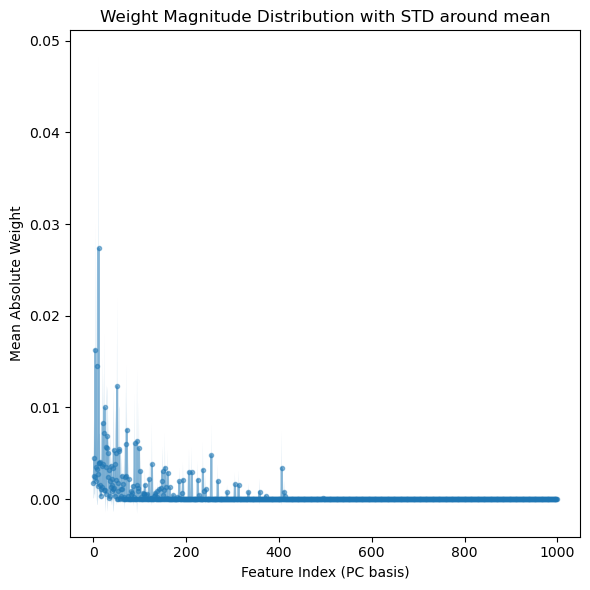

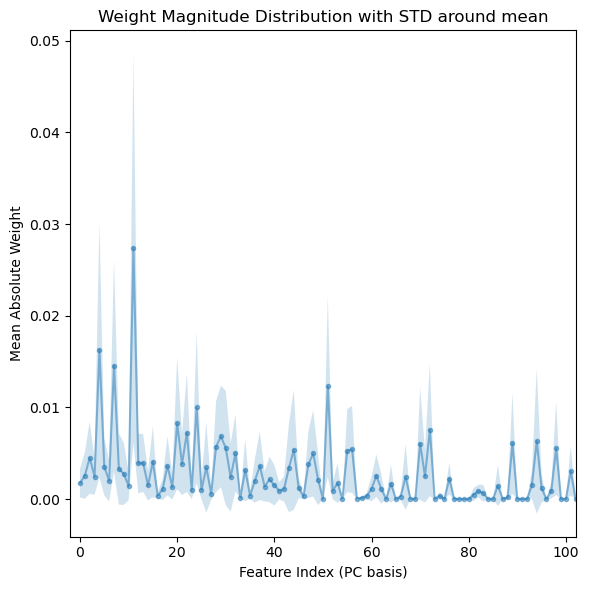

In [51]:
def visualize_weights(weights, bias, xlim=(None, None)):
    weights = weights.abs()
    mean_magnitudes = weights.mean(dim=0)
    std_magnitudes = weights.std(dim=0)
    fig = plt.figure(figsize=(6, 6))
    plt.plot(idx, mean_magnitudes, marker='o', markersize=3, alpha=0.5)
    plt.fill_between(idx, mean_magnitudes - std_magnitudes, mean_magnitudes + std_magnitudes, alpha=0.2,lw=0.5)
    if xlim is not None:
        plt.xlim(xlim)
    plt.title("Weight Magnitude Distribution with STD around mean")
    plt.xlabel("Feature Index (PC basis)")
    plt.ylabel("Mean Absolute Weight")
    plt.tight_layout()
    # plt.show()
    return fig

visualize_weights(weights, bias).show()
visualize_weights(weights, bias, xlim=(-2, 102)).show()

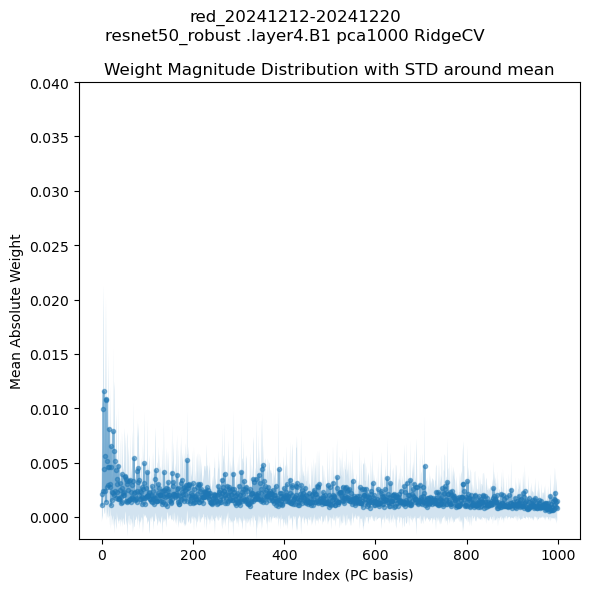

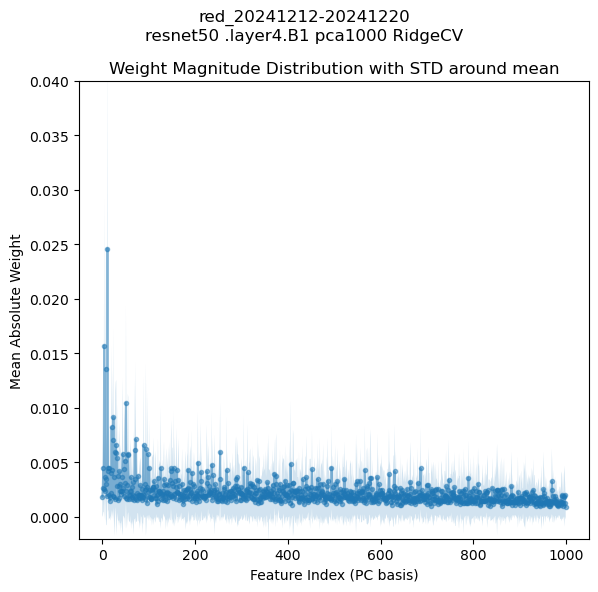

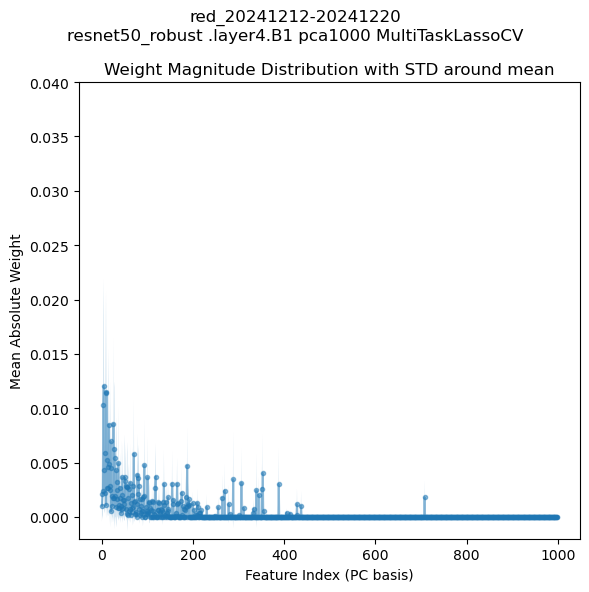

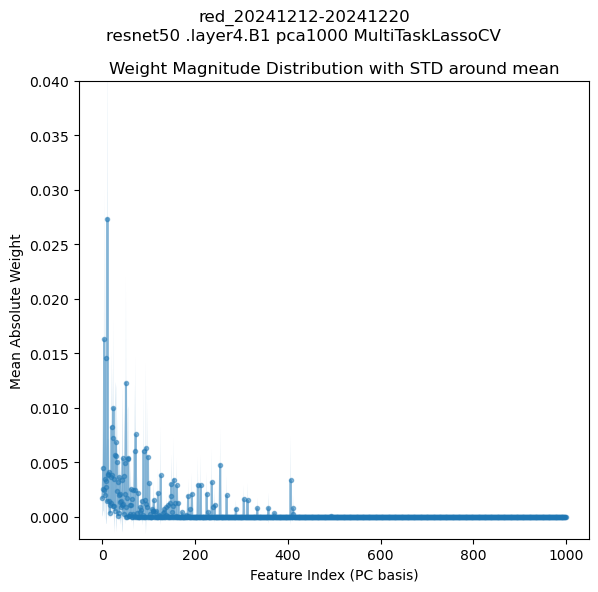

In [57]:
for regressor_name in ["RidgeCV", "MultiTaskLassoCV"]:
    for modelname in ["resnet50_robust", "resnet50"]:
        weights, bias, transformer_weights, meta_info = load_model_weights(
            subject_id, modelname, layer_name, dim_red, regressor_name
        )
        fig = visualize_weights(weights, bias)
        fig.suptitle(f"{subject_id}\n{modelname} {layer_name.replace('Bottleneck', 'B')} {dim_red} {regressor_name}")
        plt.tight_layout()
        plt.ylim(-0.002, 0.04)
        fig.show()
